# Geometry Optimisation

## Analytical Solution for a Harmonic Potential

### 1.

Write a Python function to calculate the potential energy surface for a diatomic molecule with a harmonic bond potential,

$$U(r) = \frac{k}{r}\left(r- r_0\right)^2$$ 

where $k$ is the bond force constant and $r_0$ is the equilibrium bond length.

Your function should take three arguments as input; $r$, $k$, and $r_0$; and return the potential energy for the input value of $r$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def harmonic_potential(r, k, r0):
    """
    Calculate the potential energy for a diatomic molecule with harmonic bond potential.
    
    Args:
        r (float): Bond length
        k (float): Force constant
        r0 (float): Equilibrium bond length
    
    Returns:
        float: Potential energy U(r)
        
    """
    return (k/2) * (r - r0)**2

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

### 2.

Plot this function for H<sub>2</sub> ($r_0$ = 0.74 Å, $k$ = 36.0 eV Å<sup>&minus;2</sup>) for 0.38 $\leq r \leq$ 1.1.

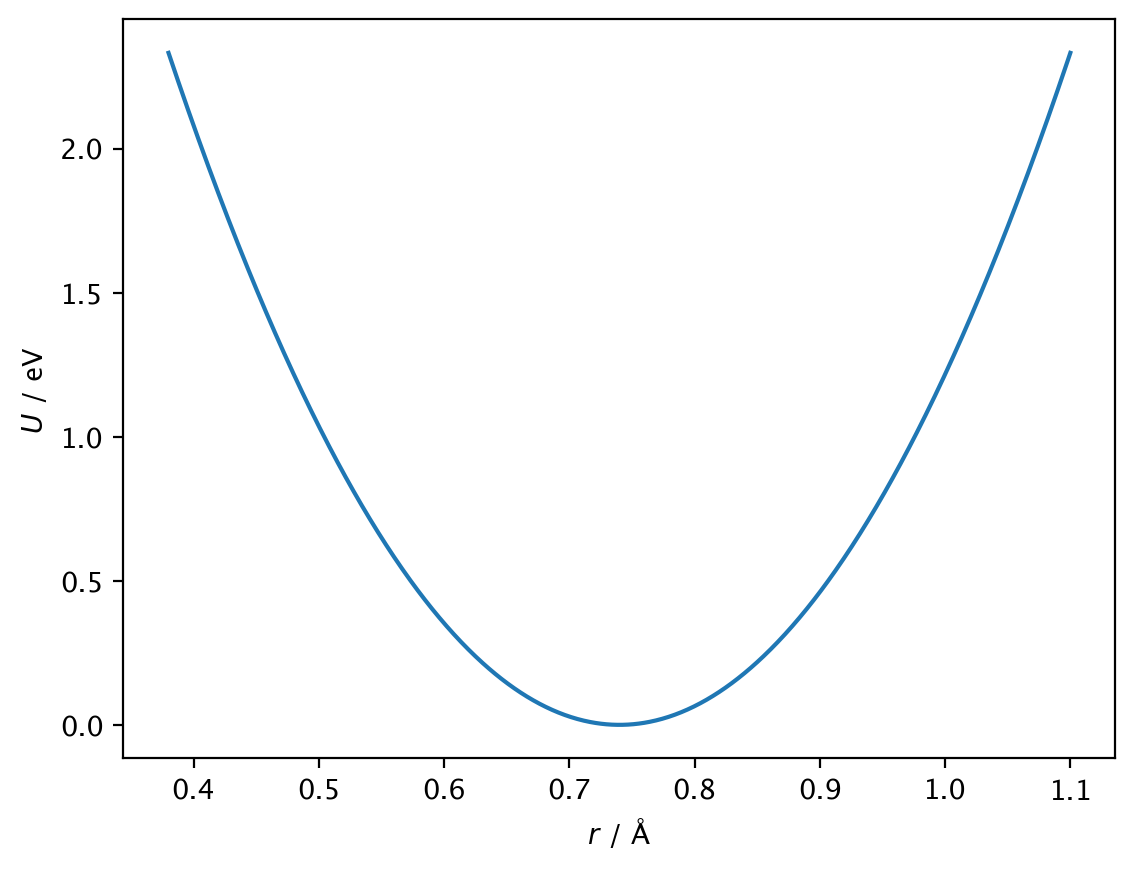

In [3]:
# Parameters for H2 molecule
r0 = 0.74  # Equilibrium bond length in Angstroms
k = 36.0   # Force constant in eV/A^2

# Create array of r values
r = np.linspace(0.38, 1.1, 1000)

# Calculate potential energies
U = harmonic_potential(r, k, r0)

# Create the plot
plt.plot(r, U, '-')
plt.xlabel('$r$ / Å')
plt.ylabel('$U$ / eV')
plt.show()

### 3.

Use your function to calculate the potential energy at $r = r_0$. Add a point to your plot at $\left(U(r_0), r_0\right)$ and confirm visually that this is the minimum of the potential energy surface.

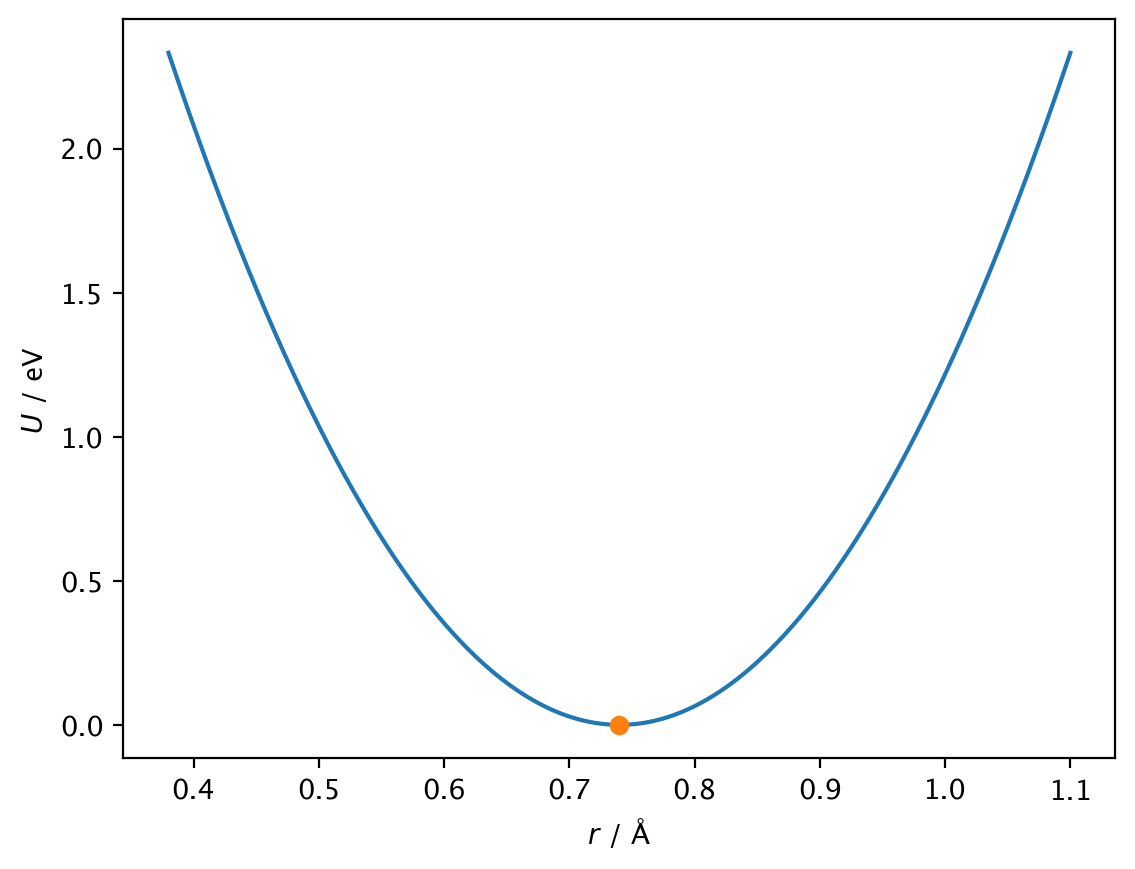

In [4]:
# Calculate U at the equilibrium distance, r0
U_min = harmonic_potential(r0, k, r0)

# Create the plot
plt.plot(r, U, '-')
plt.plot(r0, U_min, 'o')
plt.xlabel('$r$ / Å')
plt.ylabel('$U$ / eV')
plt.show()

## Grid Search Method

### 1.

Write code to perform a grid search to find the minimum of your harmonic potential. Use numpy's `linspace()` function to create your grid in the range 0.38$\leq r \leq$1.1.

In [5]:
# Create our grid
r_grid = np.linspace(0.38, 1.1, 100)

# Calculate U at every grid point
U_at_grid_points = harmonic_potential(r_grid, k, r0)

# Find the grid point with the minimum value of U
min_U_location = np.argmin(U_at_grid_points)

# Print the value of r at the minimum energy grid point
print(r_grid[min_U_location])

0.7363636363636363


```{note}
Because this grid only has 100 evenly spaced points between $r=0.38$ Å and $r=1.1$ Å, we do not find the exact minimum, but only the grid point closest to the minimum. We would get closer to the true minimum if we had a finer grid spacing, but this would then require more calculations of our potential energy. For the harmonic potential we are modelling here, calculating U is very fast, but this could be a slow and expensive calculation if we were using accurate computational methods to calculate the energy of a molecule.
```

## Gradient Descent Method

### 1.

Write a function to calculate the first derivative of a harmonic potential:

$$U^\prime = 2k\left(r-r_0\right)$$

Using this function, write code to perform a gradient descent search, to find the minimum of your harmonic potential energy surface. Use $r$ = 1.0 Å as your starting position, and a step size $\Delta r$ = 0.1 Å.

In [6]:
def harmonic_potential_gradient(r, k, r0):
    """
    Calculate the gradient of the potential energy potential energy
    for a diatomic molecule with harmonic bond potential.

    Args:
        r (float): Bond length
        k (float): Force constant
        r0 (float): Equilibrium bond length
    
    Returns:
        float: Potential energy gradient dU(r)/dr
        
    """
    return 2*k*(r-r0)
    

In [7]:
r = 1.0 # initial guess
delta_r = 0.1 # step size

for i in range(10): # loop for 10 steps
    # calculate the gradient
    dUdr = harmonic_potential_gradient(r, k, r0)
    # move in the direction *opposite* to the gradient, i.e., downhill.
    if dUdr > 0: # gradient is +ve
        r = r - delta_r # so move in a -ve direction
    elif dUdr < 0: # gradient is -ve
        r = r + delta_r # so move in a +ve direction
    print(f'step number: {i+1} --> r = {r}')

step number: 1 --> r = 0.9
step number: 2 --> r = 0.8
step number: 3 --> r = 0.7000000000000001
step number: 4 --> r = 0.8
step number: 5 --> r = 0.7000000000000001
step number: 6 --> r = 0.8
step number: 7 --> r = 0.7000000000000001
step number: 8 --> r = 0.8
step number: 9 --> r = 0.7000000000000001
step number: 10 --> r = 0.8


```{note}
This code does not test to see if we are close to the minimum, so our calculation gets close to the minimum and then jumps back and forth between $r$ = 0.8 Å and $r$ = 0.7 Å.
```

````{note}
An alternative way to always move in the opposite direction to the potential energy gradient is to use the *sign* of `dUdr`. We can calculate this using `np.sign()`, which returns `-1.0` for input values less than zero, `1.0` for input values greater than zero, and `0.0` if our input is exactly zero.
```python
# move in the direction *opposite* to the gradient, i.e., downhill
r = r - np.sign(dUdr) * delta_r
```
````

### Rescaling the Step Size

#### 1.

Write a new version of your steepest descent code that rescales the step to be proportional to the local force, with $\alpha$ = 0.001.
You should write this as a loop that iteratively updates the current position, i.e.

$$r_{i+1} = r_i + \alpha F(r_i)$$

By combining a suitable `if` statement with `break`, have your code stop and report the predicted equilibrium bond length when $U^\prime \le \left|0.001\right|$.

In [15]:
r = 1.0 # initial guess
alpha = 0.01 # step size scaling factor
max_iterations = 30 # maximum number of iterations
convergence_threshold = 0.001

for i in range(max_iterations):
    dUdr = harmonic_potential_gradient(r, k, r0)
    if np.abs(dUdr) < convergence_threshold:
        print(f'minimisation converged at r={r} Å in {i} steps')
        print(f'dUdr = {dUdr} eV Å^-1')
        break
    else:
        # move in the direction opposite to the gradient, i.e., downhill
        r = r - alpha * dUdr # over-write r with the new value
        print(f'step {i}: r = {r} Å, dU/dr = {dUdr} eV Å^-1')
else:
    print('foo')

step 0: r = 0.8128 Å, dU/dr = 18.72 eV Å^-1
step 1: r = 0.760384 Å, dU/dr = 5.241599999999998 eV Å^-1
step 2: r = 0.74570752 Å, dU/dr = 1.467647999999997 eV Å^-1
step 3: r = 0.7415981056 Å, dU/dr = 0.41094143999999755 eV Å^-1
step 4: r = 0.740447469568 Å, dU/dr = 0.11506360319999676 eV Å^-1
step 5: r = 0.74012529147904 Å, dU/dr = 0.03221780889600101 eV Å^-1
step 6: r = 0.7400350816141312 Å, dU/dr = 0.00902098649088412 eV Å^-1
step 7: r = 0.7400098228519567 Å, dU/dr = 0.0025258762174491523 eV Å^-1
minimisation converged at r=0.7400098228519567 Å in 8 steps
dUdr = 0.0007072453408838442 eV Å^-1


#### 2.

How does changing the $\alpha$ affect your rate of convergence? Experiment with larger and smaller values of $\alpha$.

First, let us wrap our minimisation code in a function for easy reuse.

In [30]:
def gradient_descent(r_init, k, r0, alpha=0.01, conv=0.001, max_iter=30):
    """Perform gradient descent minimisation for a harmonic potential.

    Returns a dictionary of
        {
         'r0': Predicted equilibrium bond length in Å (float),
         'niter': number of iterations performed (int),
         'conv': whether convergence was reached (bool).
        }
    
    Args:
        r_init (float): Initial guess for the equilibrium bond length in Å.
        k (float): Force constant.
        r0 (float): Equilibrium bond length in Å.
        alpha (optional: float): Step-size scaling factor. Default is 0.01.
        conv (optional: float): Convergence threshold in eV Å^-1. Default is 0.001.
        max_iter (optional: int): Maximum number of iterations. Default is 30.
        
    Returns:
        (dict(str: float, 
              str: int, 
              str: bool))
                            
    """
    r = r_init
    for i in range(max_iter):
        dUdr = harmonic_potential_gradient(r, k, r0)
        if np.abs(dUdr) < conv:
            return {'r0': r,
                    'niter': i+1,
                    'conv': True}
        else:
            r = r - alpha * dUdr
    return {'r0': r,
            'niter': i+1,
            'conv': False}
            

Running with the default arguments should give us the same result as before.

In [23]:
gradient_descent(r_init=1.0, k=k, r0=r0)

{'r0': 0.7400098228519567, 'niter': 9, 'conv': True}

Running with $\alpha$ = 0.001, we take much smaller steps and do not reach convergence in 30 steps.

In [24]:
gradient_descent(r_init=1.0, k=k, r0=r0, alpha=0.001)

{'r0': 0.7676320199982004, 'niter': 30, 'conv': False}

If we increase the maximum number of steps, then we do reach convergence (eventually):

In [26]:
gradient_descent(r_init=1.0, k=k, r0=r0, alpha=0.001, max_iter=200)

{'r0': 0.7400135302620781, 'niter': 133, 'conv': True}

If we increase $\alpha$ too much, we get _divergence_ and never converge.

In [55]:
gradient_descent(r_init=1.0, k=k, r0=r0, alpha=0.028)

{'r0': 1.1585858916145688,
 'niter': 30,
 'conv': False,
 'r_values': array([1.        , 0.47584   , 1.00838656, 0.46731926, 1.01704364,
        0.45852366, 1.02597996, 0.44944436, 1.03520453, 0.4400722 ,
        1.04472664, 0.43039773, 1.05455591, 0.4204112 , 1.06470222,
        0.41010254, 1.07517582, 0.39946137, 1.08598725, 0.38847696,
        1.09714741, 0.37713823, 1.10866756, 0.36543376, 1.1205593 ,
        0.35335175, 1.13283462, 0.34088003, 1.14550589, 0.32800601,
        1.15858589])}

To see why this happens, let us modify our function to also return the r values for each iteration:

In [77]:
def gradient_descent(r_init, k, r0, alpha=0.01, conv=0.001, max_iter=30):
    """Perform gradient descent minimisation for a harmonic potential.

    Returns a dictionary of
        {
         'r0': Predicted equilibrium bond length in Å (float),
         'niter': number of iterations performed (int),
         'conv': whether convergence was reached (bool),
         'r_values': sequence of r values for each step of the minimisation (np.ndarray).
        }
    
    Args:
        r_init (float): Initial guess for the equilibrium bond length in Å.
        k (float): Force constant.
        r0 (float): Equilibrium bond length in Å.
        alpha (optional: float): Step-size scaling factor. Default is 0.01.
        conv (optional: float): Convergence threshold in eV Å^-1. Default is 0.001.
        max_iter (optional: int): Maximum number of iterations. Default is 30.
        
    Returns:
        (dict(str: float, 
              str: int, 
              str: bool,
              str: np.ndarray))
                            
    """
    r = r_init
    r_values = [r]
    for i in range(max_iter):
        dUdr = harmonic_potential_gradient(r, k, r0)
        if np.abs(dUdr) < conv:
            return {'r0': r,
                    'niter': i,
                    'conv': True,
                    'r_values': np.array(r_values)}
        else:
            r = r - alpha * dUdr
            r_values.append(r)
    return {'r0': r,
            'niter': i+1,
            'conv': False,
            'r_values': np.array(r_values)}

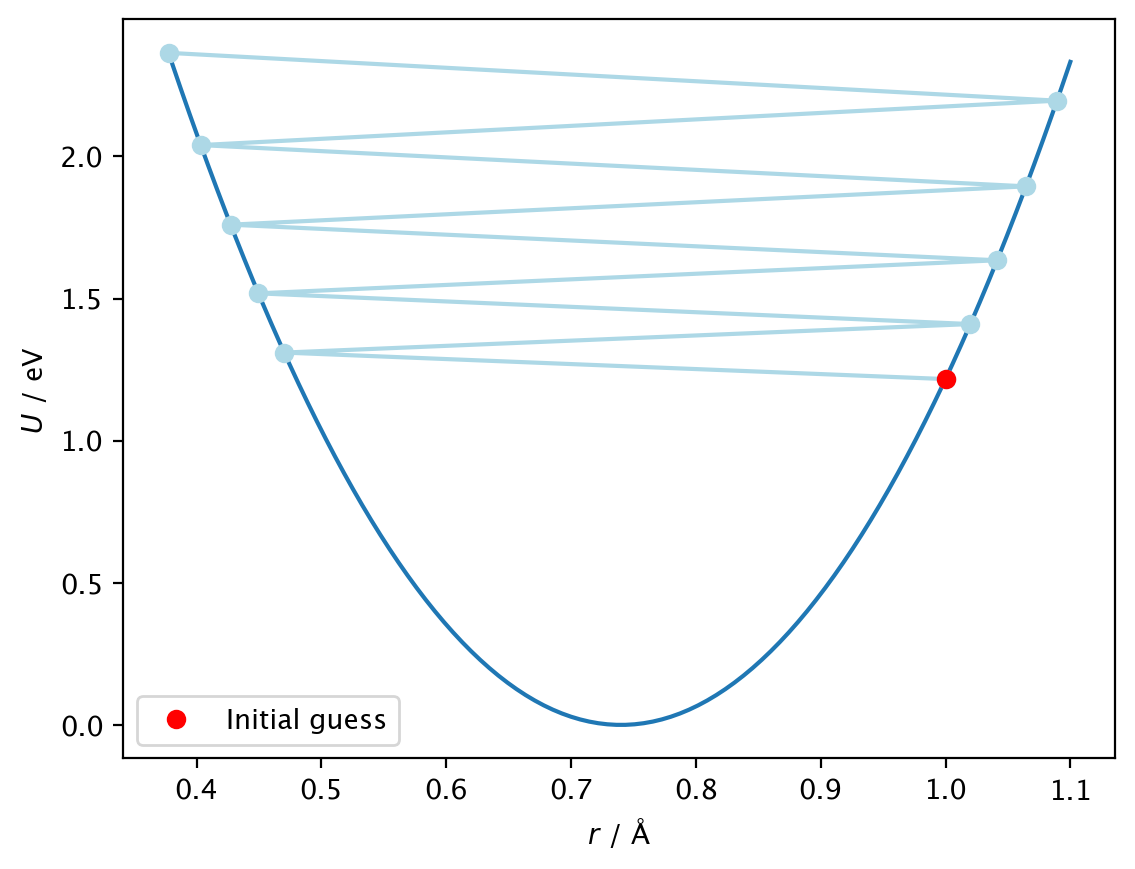

In [78]:
result = gradient_descent(r_init=1.0, k=k, r0=r0, alpha=0.0283)

r_range = np.linspace(0.38, 1.1, 100)
U = harmonic_potential(r_range, k, r0)

r_values_to_plot = result['r_values'][:10] # just plot the first 10 iterations
U_values_to_plot = harmonic_potential(r_values_to_plot, k, r0) # calculate the corresponding U values.

# Create the plot
plt.plot(r_grid, U, '-')
plt.plot(r_values_to_plot, U_values_to_plot, 'o-', color='lightblue')
plt.plot(r_values_to_plot[0], U_values_to_plot[0], 'o', color='red', label='Initial guess')
plt.xlabel('$r$ / Å')
plt.ylabel('$U$ / eV')
plt.legend()
plt.show()

Now, our $\alpha$ value is large enough that we overshoot the minimum and end up **higher** up the potential than we started. On the next move we overshoot the minimum again and end up even higher, again, up the potential. With each step we move **further** from the minimum. Eventually, we reach the maximum number of iterations, or the value of $r$ becomes so large that Python raises an error and our code stops.

## The Newton-Raphson Method

### 1.

Write a function to calculate the second derivative of a harmonic potential

$$U^{\prime\prime} = 2k$$

In [79]:
def harmomic_potential_second_derivative(k):
    """Returns the second derivative of a harmonic potential.
    
    Args:
        k (float): Force constant
        
    Returns:
        float
        
    """
    return 2 * k

### 2.

Show that the Newton-Raphson method finds the optimal bond length for your harmonic potential in one step, irrespective of your starting point.

First, let us write a minimisation routine that uses the Newton-Raphson method.

In [84]:
def newton_raphson(r_init, k, r0, conv=0.001, max_iter=30):
    """Perform Newton-Raphson minimisation for a harmonic potential.

    Returns a dictionary of
        {
         'r0': Predicted equilibrium bond length in Å (float),
         'niter': number of iterations performed (int),
         'conv': whether convergence was reached (bool),
         'r_values': sequence of r values for each step of the minimisation (np.ndarray).
        }
    
    Args:
        r_init (float): Initial guess for the equilibrium bond length in Å.
        k (float): Force constant.
        r0 (float): Equilibrium bond length in Å.
        alpha (optional: float): Step-size scaling factor. Default is 0.01.
        conv (optional: float): Convergence threshold in eV Å^-1. Default is 0.001.
        max_iter (optional: int): Maximum number of iterations. Default is 30.
        
    Returns:
        (dict(str: float, 
              str: int, 
              str: bool,
              str: np.ndarray))
                            
    """
    r = r_init
    r_values = [r]
    for i in range(max_iter):
        dUdr = harmonic_potential_gradient(r, k, r0)
        if np.abs(dUdr) < conv:
            return {'r0': r,
                    'niter': i,
                    'conv': True,
                    'r_values': np.array(r_values)}
        d2Udr2 = harmomic_potential_second_derivative(k)
        r = r - dUdr / d2Udr2
        r_values.append(r)
    return {'r0': r,
            'niter': i+1,
            'conv': False,
            'r_values': np.array(r_values)}

Now, we can call our function with different starting values of $r$. In all cases, we converge on the exact minimum in 1 step.

In [85]:
newton_raphson(r_init=1.0, k=k, r0=r0)

{'r0': 0.74, 'niter': 1, 'conv': True, 'r_values': array([1.  , 0.74])}

In [86]:
newton_raphson(r_init=2.0, k=k, r0=r0)

{'r0': 0.74, 'niter': 1, 'conv': True, 'r_values': array([2.  , 0.74])}

In [87]:
newton_raphson(r_init=0.5, k=k, r0=r0)

{'r0': 0.74, 'niter': 1, 'conv': True, 'r_values': array([0.5 , 0.74])}